<a href="https://colab.research.google.com/github/Erenhub/StyleGAN---make-your-webcam-photo-smile/blob/master/Copy_of_StyleGAN_Encoder_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
My First StyleGAN Encoder - getting started with https://github.com/pbaylies/stylegan-encoder
  
 * Note: make sure you're using the GPU runtime for this - see Runtime -> Change Runtime Type in Google Colab
  
First, clone the repo - we'll put it in the current directory:

In [0]:
!rm -rf sample_data
!git clone https://github.com/pbaylies/stylegan-encoder
!mv stylegan-encoder/* stylegan-encoder/.git .
!rmdir stylegan-encoder

Cloning into 'stylegan-encoder'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 480 (delta 4), reused 20 (delta 3), pack-reused 453
Receiving objects: 100% (480/480), 12.80 MiB | 30.40 MiB/s, done.
Resolving deltas: 100% (261/261), done.


In [0]:
Optionally, try training a ResNet of your own if you like; this could take a while. Remember, there's a pre-trained model linked in the repo that works with the FFHQ faces StyleGAN model)

In [0]:
!python train_resnet.py --help
!python train_resnet.py --test_size 256 --batch_size 1024 --loop 1 --max_patience 1

Using TensorFlow backend.
usage: train_resnet.py [-h] [--model_url MODEL_URL] [--model_res MODEL_RES]
                       [--data_dir DATA_DIR] [--model_path MODEL_PATH]
                       [--image_size IMAGE_SIZE] [--batch_size BATCH_SIZE]
                       [--test_size TEST_SIZE] [--max_patience MAX_PATIENCE]
                       [--epochs EPOCHS] [--seed SEED] [--loop LOOP]

Train a ResNet to predict latent representations of images in a StyleGAN model
from generated examples

optional arguments:
  -h, --help            show this help message and exit
  --model_url MODEL_URL
                        Fetch a StyleGAN model to train on from this URL
                        (default: https://drive.google.com/uc?id=1MEGjdvVpUsu1
                        jB4zrXZN7Y4kBBOzizDQ)
  --model_res MODEL_RES
                        The dimension of images in the StyleGAN model
                        (default: 1024)
  --data_dir DATA_DIR   Directory for storing the ResNet model (defau

Next, let's get some test images to work with... These are from Pexels, which has free stock photos.

In [0]:
!mkdir aligned_images raw_images

!wget -O raw_images/cemersoy.jpg 'http://netlab.boun.edu.tr/WiSe/lib/exe/fetch.php/cemersoy.jpg?w=170&h=195'
#!wget -O raw_images/taylancemgil.jpg 'https://pbs.twimg.com/profile_images/826358695378485248/6Uja-lY7_400x400.jpg'
#!wget -O raw_images/tungagungor.jpg 'https://haberler.boun.edu.tr/sites/haberler.boun.edu.tr/files/styles/haber_front_2_coloumn_-_crop/public/haber-resimleri/IMG_7710.jpg?itok=MBKDFQdW&c=9484b5b107eea4726cd01579c0363577'
#!wget -O raw_images/halukbingol.jpg 'https://www.cmpe.boun.edu.tr/sites/default/files/halukbingol-c_201707-reduced.jpg'
#!wget -O raw_images/laleakarun.jpg 'https://haberler.boun.edu.tr/sites/haberler.boun.edu.tr/files/kapak-ve-haber-resimleri/594781344e6073.jpg'
!wget -O raw_images/cemsay.jpg 'https://pbs.twimg.com/profile_images/1048601363612160000/gEQXhLwi_400x400.jpg'
!wget -O raw_images/arzucanozgur.jpg 'https://tabilab.cmpe.boun.edu.tr/assets/photos/arzucan_ozgur.jpg'
#!wget -O raw_images/suzan.jpg 'https://pbs.twimg.com/profile_images/649988816/SuzanUskudarli.jpg'
#!wget -O raw_images/inci.jpg 'https://www.cmpe.boun.edu.tr/sites/default/files/styles/professor_personal_page/public/featured/person/%C4%B0nci%20Meliha%20Bayta%C5%9F/i_baytas.jpg?itok=Tgq37DBm'
#!wget -O raw_images/alpersen.jpg 'https://www.cmpe.boun.edu.tr/sites/default/files/styles/professor_personal_page/public/featured/person/alpersenfoto.jpg?itok=EhSx_Dbq'
!wget -O raw_images/tunatugcu.jpg 'https://www.cmpe.boun.edu.tr/sites/default/files/featured/person/tuna_tugcu.jpg'



--2019-12-21 15:49:49--  http://netlab.boun.edu.tr/WiSe/lib/exe/fetch.php/cemersoy.jpg?w=170&h=195
Resolving netlab.boun.edu.tr (netlab.boun.edu.tr)... 79.123.177.242
Connecting to netlab.boun.edu.tr (netlab.boun.edu.tr)|79.123.177.242|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68895 (67K) [image/jpeg]
Saving to: ‘raw_images/cemersoy.jpg’

raw_images/cemersoy 100%[===================>]  67.28K  67.3KB/s    in 1.0s    

2019-12-21 15:49:53 (67.3 KB/s) - ‘raw_images/cemersoy.jpg’ saved [68895/68895]

--2019-12-21 15:49:54--  https://pbs.twimg.com/profile_images/1048601363612160000/gEQXhLwi_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 72.21.91.70, 2600:1480:3000:e5::
Connecting to pbs.twimg.com (pbs.twimg.com)|72.21.91.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29120 (28K) [image/jpeg]
Saving to: ‘raw_images/cemsay.jpg’

raw_images/cemsay.j 100%[===================>]  28.44K  --.-KB/s    in 0s      

2019-12-21 15:4

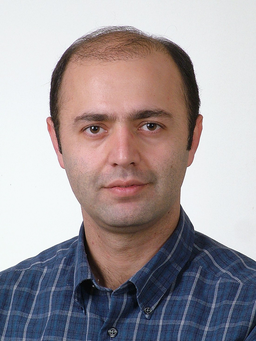

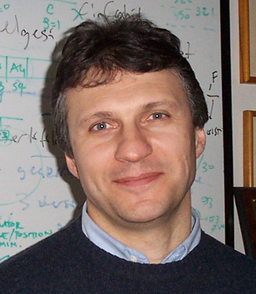

In [0]:
import PIL.Image
img1 = PIL.Image.open('raw_images/tunatugcu.jpg')
wpercent = (256/float(img1.size[0]))
hsize = int((float(img1.size[1])*float(wpercent)))
img1 = img1.resize((256,hsize), PIL.Image.LANCZOS)
img2 = PIL.Image.open('raw_images/cemersoy.jpg')
wpercent = (256/float(img2.size[0]))
hsize = int((float(img2.size[1])*float(wpercent)))
img2 = img2.resize((256,hsize), PIL.Image.LANCZOS)
display(img1,img2)

Now we need to get just the faces, cropped and aligned... fortunately, there's already a script for this!

In [0]:
!python align_images.py raw_images/ aligned_images/

Using TensorFlow backend.
64045056/64040097 [==============================] - 2s 0us/step
Aligning cemersoy.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/cemersoy_01.png
Aligning arzucanozgur.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/arzucanozgur_01.png
Aligning cemsay.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/cemsay_01.png
Aligning tunatugcu.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/tunatugcu_01.png


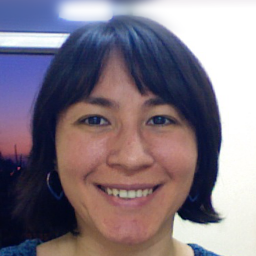

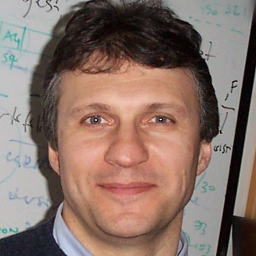

In [0]:
display(PIL.Image.open('aligned_images/arzucanozgur_01.png').resize((256,256)))
display(PIL.Image.open('aligned_images/cemersoy_01.png').resize((256,256)))

Finally, let's try encoding some images into a latent representation! That's what you came here for, right? Let's just do a quick encoding, and see how we do...

In [0]:
!python encode_images.py --batch_size=2 --output_video=True aligned_images/ generated_images/ latent_representations/




Using TensorFlow backend.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





58892288/58889256 [==============================] - 2s 0us/step


  0% 0/2 [00:00<?, ?it/s]Saving mask masks/arzucanozgur_01.png
Saving mask masks/tunatugcu_01.png

  0% 0/100 [00:00<?, ?it/s]WARNING:tensorflow:
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
2019-12-21 15:52:03.910126: W tensorflow/core/common_runtime/bfc_allocator.cc:239] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_cou

Ok, let's see how we did! Note the paths above, the generated image is in the generated_images folder, the latent representation is in the latent_representations folder, and since we generated videos of the training process, by default those are in the videos folder.

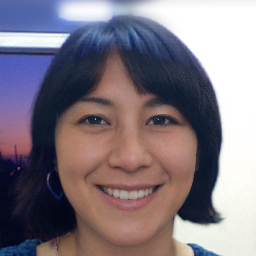

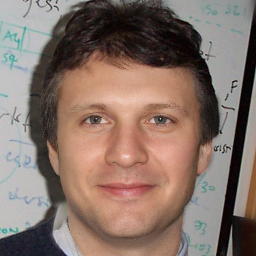

In [0]:
display(PIL.Image.open('generated_images/arzucanozgur_01.png').resize((256,256)))
display(PIL.Image.open('generated_images/cemersoy_01.png').resize((256,256)))

Great job, everybody, nailed it! ... wait, what's that you say, the second image doesn't quite look the same? Hmm... let's try to do a better job, shall we?




Using TensorFlow backend.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







  0% 0/9 [00:00<?, ?it/s]Loading mask masks/taylancemgil_01.png

  0% 0/1000 [00:00<?, ?it/s]WARNING:tensorflow:
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

taylancemgil_01: loss 239.7094; lr 0.0020:   0% 0/1000 [00:09<?, ?it/s]
taylancemgil_01: loss 239.7094; lr 0.0020:   0% 1/1000 [00:09<2:45:27,  9.94s/it]
taylancemgil_01: loss 239.5558; lr 0.0020:   0% 1/1000 [00:10<2:45:27,  9.94s/it]
taylancemgil_01: loss 239.55

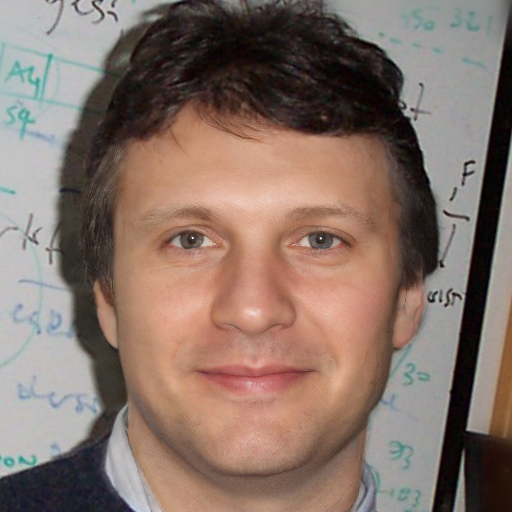

In [0]:
!mv aligned_images/cemersoy_01.png .
!python encode_images.py --output_video=True --lr=0.002 --iterations=1000 --use_l1_penalty=0.2 aligned_images/ generated_images/ latent_representations/
display(PIL.Image.open('generated_images/cemersoy_01.png').resize((512,512)))

When in doubt, mess with the parameters... here, we lowered the l1 penalty on the dlatents, to allow for greater variation outside of what StyleGAN knows well, and we've lowered the learning rate and raised the number of iterations, to allow for more gradual changes. See more options below:

In [0]:
!python encode_images.py --help




Using TensorFlow backend.
usage: encode_images.py [-h] [--data_dir DATA_DIR] [--mask_dir MASK_DIR]
                        [--load_last LOAD_LAST] [--dlatent_avg DLATENT_AVG]
                        [--model_url MODEL_URL] [--model_res MODEL_RES]
                        [--batch_size BATCH_SIZE] [--optimizer OPTIMIZER]
                        [--image_size IMAGE_SIZE]
                        [--resnet_image_size RESNET_IMAGE_SIZE] [--lr LR]
                        [--decay_rate DECAY_RATE] [--iterations ITERATIONS]
                        [--decay_steps DECAY_STEPS]
                        [--early_stopping [EARLY_STOPPING]]
                        [--early_stopping_threshold EARLY_STOPPING_THRESHOLD]
                        [--early_stopping_patience EARLY_STOPPING_PATIENCE]
                        [--load_effnet LOAD_EFFNET]
                        [--load_resnet LOAD_RESNET]
                        [--use_preprocess_input [USE_PREPROCESS_INPUT]]
                        [--use_bes

Ok, that's nice, but what to do with the latents? Well, I'm glad you asked, let's see what we can do with the two latent representations we now have to rub together...

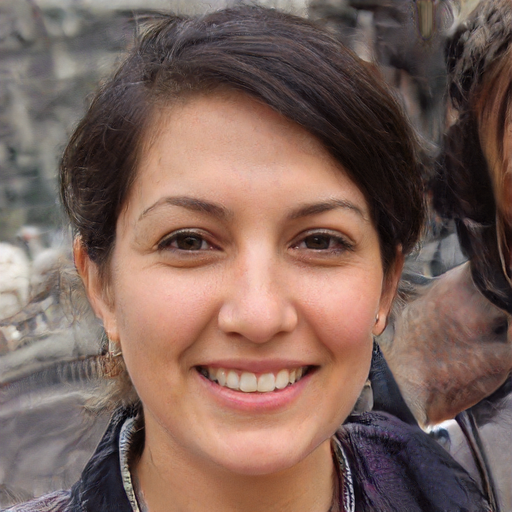

In [0]:
import numpy as np
import config
import dnnlib
import dnnlib.tflib as tflib
import pickle
import PIL.Image
# load the StyleGAN model into Colab
URL_FFHQ = 'https://drive.google.com/uc?id=1Bj5pL43keuVWMnv29zVjM-VX_nkEI4T8'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)
# load the latents
s1 = np.load('latent_representations/alpersen_01.npy')
s2 = np.load('latent_representations/arzucanozgur_01.npy')
s3 = np.load('latent_representations/cemersoy_01.npy')
s4 = np.load('latent_representations/halukbingol_01.npy')
s5 = np.load('latent_representations/inci_01.npy')
s6 = np.load('latent_representations/laleakarun_01.npy')
s7 = np.load('latent_representations/suzan_01.npy')
s8 = np.load('latent_representations/taylancemgil_01.npy')
s9 = np.load('latent_representations/tunatugcu_01.npy')


s1 = np.expand_dims(s1,axis=0)
s2 = np.expand_dims(s2,axis=0)
s3 = np.expand_dims(s3,axis=0)
s4 = np.expand_dims(s4,axis=0)
s5 = np.expand_dims(s5,axis=0)
s6 = np.expand_dims(s6,axis=0)
s7 = np.expand_dims(s7,axis=0)
s8 = np.expand_dims(s8,axis=0)
s9 = np.expand_dims(s9,axis=0)


# combine the latents somehow... let's try an average:
savg = 0.5*(s1+s2)
# run the generator network to render the latents:
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
images = Gs_network.components.synthesis.run(savg, randomize_noise=False, **synthesis_kwargs)
display(PIL.Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').resize((512,512),PIL.Image.LANCZOS))

Ok, that looks complicated. Can we do it again, but simpler? Sure. (Restart the runtime if it gives you trouble...)

Instructions for updating:
Colocations handled automatically by placer.


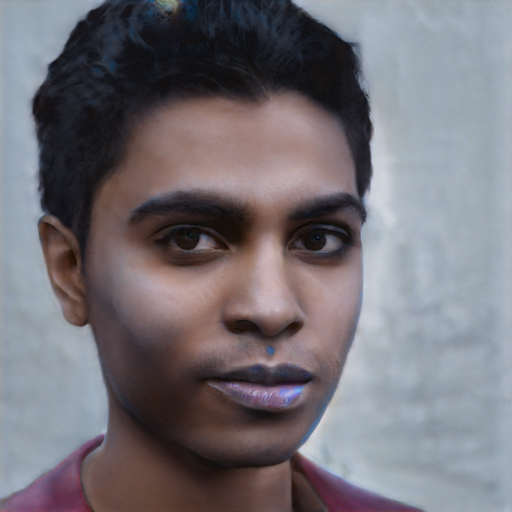

In [0]:
import math
import pickle
import PIL.Image
import numpy as np
import config
import dnnlib
import dnnlib.tflib as tflib
from encoder.generator_model import Generator
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

model_res = 1024
model_scale = int(2*(math.log(model_res,2)-1))

def generate_raw_image(latent_vector):
    latent_vector = latent_vector.reshape((1, model_scale, 512))
    generator.set_dlatents(latent_vector)
    return generator.generate_images()[0]

def generate_image(latent_vector):
    img_array = generate_raw_image(latent_vector)
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img

s1 = np.load('latent_representations/stock_photo_01.npy')
s2 = np.load('latent_representations/stock_photo2_01.npy')
s1 = np.expand_dims(s1,axis=0)
s2 = np.expand_dims(s2,axis=0)

display(generate_image(0.3*s1+0.7*s2).resize((512,512),PIL.Image.LANCZOS))

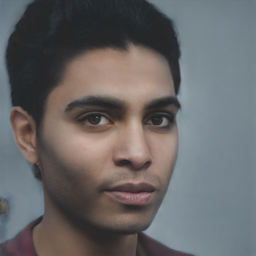

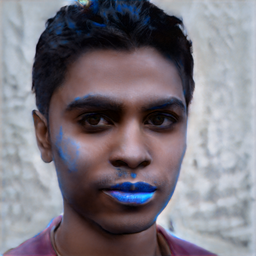

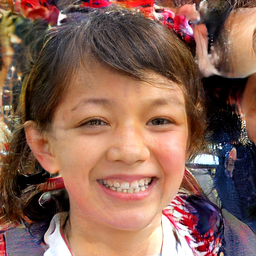

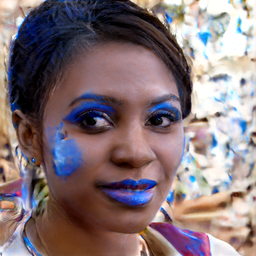

In [0]:
# more stupid latent tricks
lr = ((np.arange(1,model_scale+1)/model_scale)**0.75).reshape((model_scale,1))
rl = 1-lr
display(generate_image(lr*s1+rl*s2).resize((256,256),PIL.Image.LANCZOS))

lr = ((np.arange(1,model_scale+1)/model_scale)**0.25).reshape((model_scale,1))
rl = 1-lr
display(generate_image(lr*s2+rl*s1).resize((256,256),PIL.Image.LANCZOS))

display(generate_image(-0.5*s1).resize((256,256),PIL.Image.LANCZOS))
display(generate_image(-0.5*s1+(lr*s2+rl*s1)).resize((256,256),PIL.Image.LANCZOS))

In [0]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
URL_FFHQ = 'https://drive.google.com/uc?id=1Bj5pL43keuVWMnv29zVjM-VX_nkEI4T8'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [0]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [0]:
# Loading already learned representations
donald_trump = np.load('ffhq_dataset/latent_representations/donald_trump_01.npy')
hillary_clinton = np.load('ffhq_dataset/latent_representations/hillary_clinton_01.npy')
yeni = np.load('latent_representations/arzucanozgur_01.npy')
yeni2 = np.load('latent_representations/tunatugcu_01.npy')
yeni3 = np.load('latent_representations/cemsay_01.npy')
yeni4 = np.load('latent_representations/cemersoy_01.npy')
# Of course you can learn your own vectors using two scripts

# 1) Extract and align faces from images
# python align_images.py raw_images/ aligned_images/

# 2) Find latent representation of aligned images
# python encode_images.py aligned_images/ generated_images/ latent_representations/

In [0]:

# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')

# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

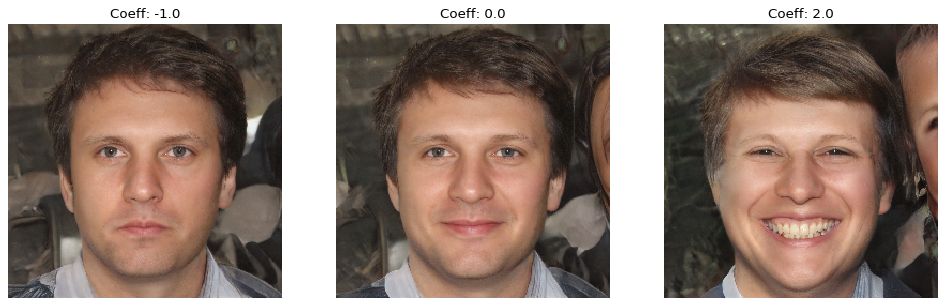

In [0]:
move_and_show(yeni4, smile_direction, [-1, 0, 2])


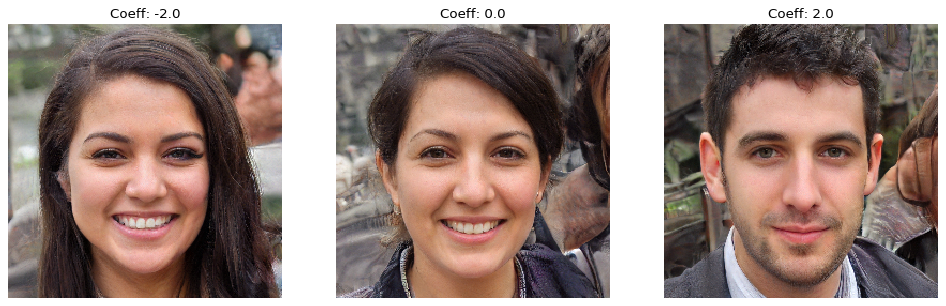

In [0]:
move_and_show(yeni2, gender_direction, [-2, 0, 2])


In [0]:
move_and_show(hillary_clinton, smile_direction, [-1, 0, 1])


NameError: ignored